## Języki skryptowe w analizie danych
### Projekt 2, język R

Analizowana baza danych pochodzi ze strony: https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows .

Dataset składa się z 1450 rekordów i 12 kolumn:
- show_id
- type
- title
- director
- cast
- country
- date_added
- release_year
- rating
- duration
- listed_in
- description


### Wykorzystywane biblioteki

In [261]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(stringr)
library(lubridate)

### Wczytanie i przegląd danych, wstępna obróbka

In [264]:
data <- read.csv("disney_plus_titles.csv", sep=",")
head(data)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacNeille, Bill Farmer, Russi Taylor, Corey Burton",,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
2,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. Nic.
3,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis Leary, Queen Latifah",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
4,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexander Jean, Fall Out Boy, Jimmie Allen",,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,s5,TV Show,The Beatles: Get Back,,"John Lennon, Paul McCartney, George Harrison, Ringo Starr",,"November 25, 2021",2021,,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson capturing a moment in music history with The Beatles.
6,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of adventurer Jacques-Yves Cousteau.


In [266]:
data <- data %>%
mutate(across(where(is.character), ~ ifelse(. == "" | is.na(.), "Undefined", .)))

In [268]:
head(data)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacNeille, Bill Farmer, Russi Taylor, Corey Burton",Undefined,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
2,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",Undefined,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. Nic.
3,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis Leary, Queen Latifah",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
4,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexander Jean, Fall Out Boy, Jimmie Allen",Undefined,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
5,s5,TV Show,The Beatles: Get Back,Undefined,"John Lennon, Paul McCartney, George Harrison, Ringo Starr",Undefined,"November 25, 2021",2021,Undefined,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson capturing a moment in music history with The Beatles.
6,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of adventurer Jacques-Yves Cousteau.


In [270]:
summary(data)

   show_id              type              title             director        
 Length:1450        Length:1450        Length:1450        Length:1450       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
     cast             country           date_added         release_year 
 Length:1450        Length:1450        Length:1450        Min.   :1928  
 Class :character   Class :character   Class :character   1st Qu.:1999  
 Mode  :character   Mode  :character   Mode  :character   Median :2011  
                                                          Mean   :2003  
                                                          3rd Qu.:2018  
                       

In [272]:
numeric_columns <- data[sapply(data, is.numeric)]
summary(numeric_columns)

  release_year 
 Min.   :1928  
 1st Qu.:1999  
 Median :2011  
 Mean   :2003  
 3rd Qu.:2018  
 Max.   :2021  

In [274]:
dim(data)

[1] 1450   12

### Wizualizacje

In [277]:
custom_colors <- c("#292d54", "#4b507d")
options(repr.plot.width = 12, repr.plot.height = 8)

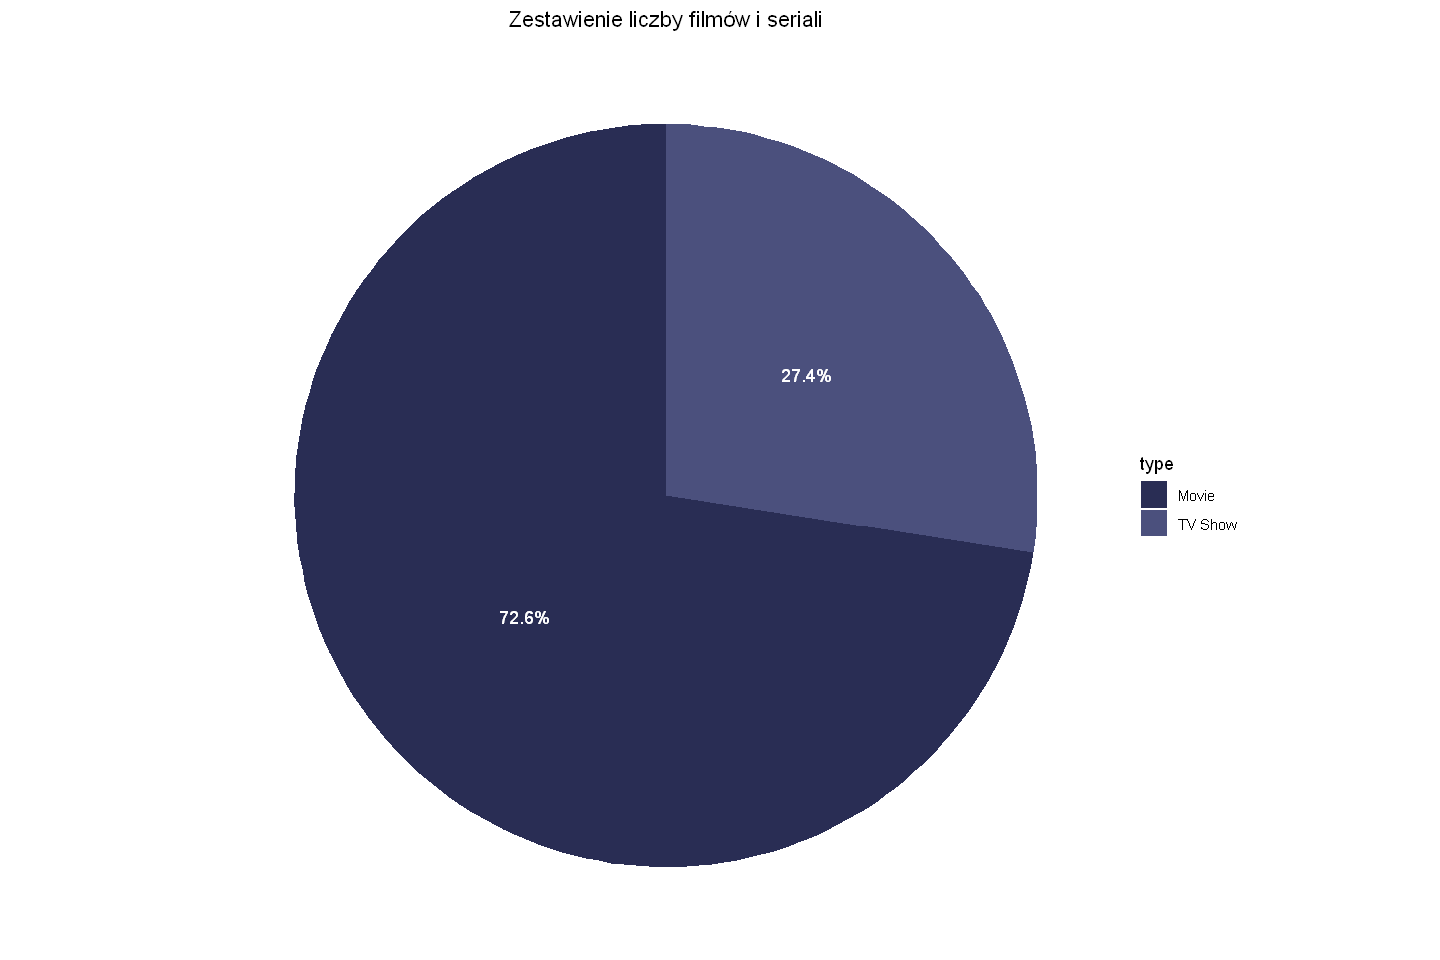

In [279]:
counts <- table(data$type)
plot_data <- as.data.frame(counts)
colnames(plot_data) <- c("type", "count")

plot_data$fraction <- plot_data$count / sum(plot_data$count)
plot_data$percent <- plot_data$fraction * 100

ggplot(plot_data, aes(x = "", y = count, fill = type)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y", start = 0) +
  scale_fill_manual(values = custom_colors) +  
  theme_void() +
  labs(title = "Zestawienie liczby filmów i seriali") +
  theme(plot.title = element_text(hjust = 0.5)) +
  geom_text(aes(label = paste0(round(percent, 1), "%")), position = position_stack(vjust = 0.5), color="white")

Przeważająca część produkcji dostępnych na Disney+ to seriale.

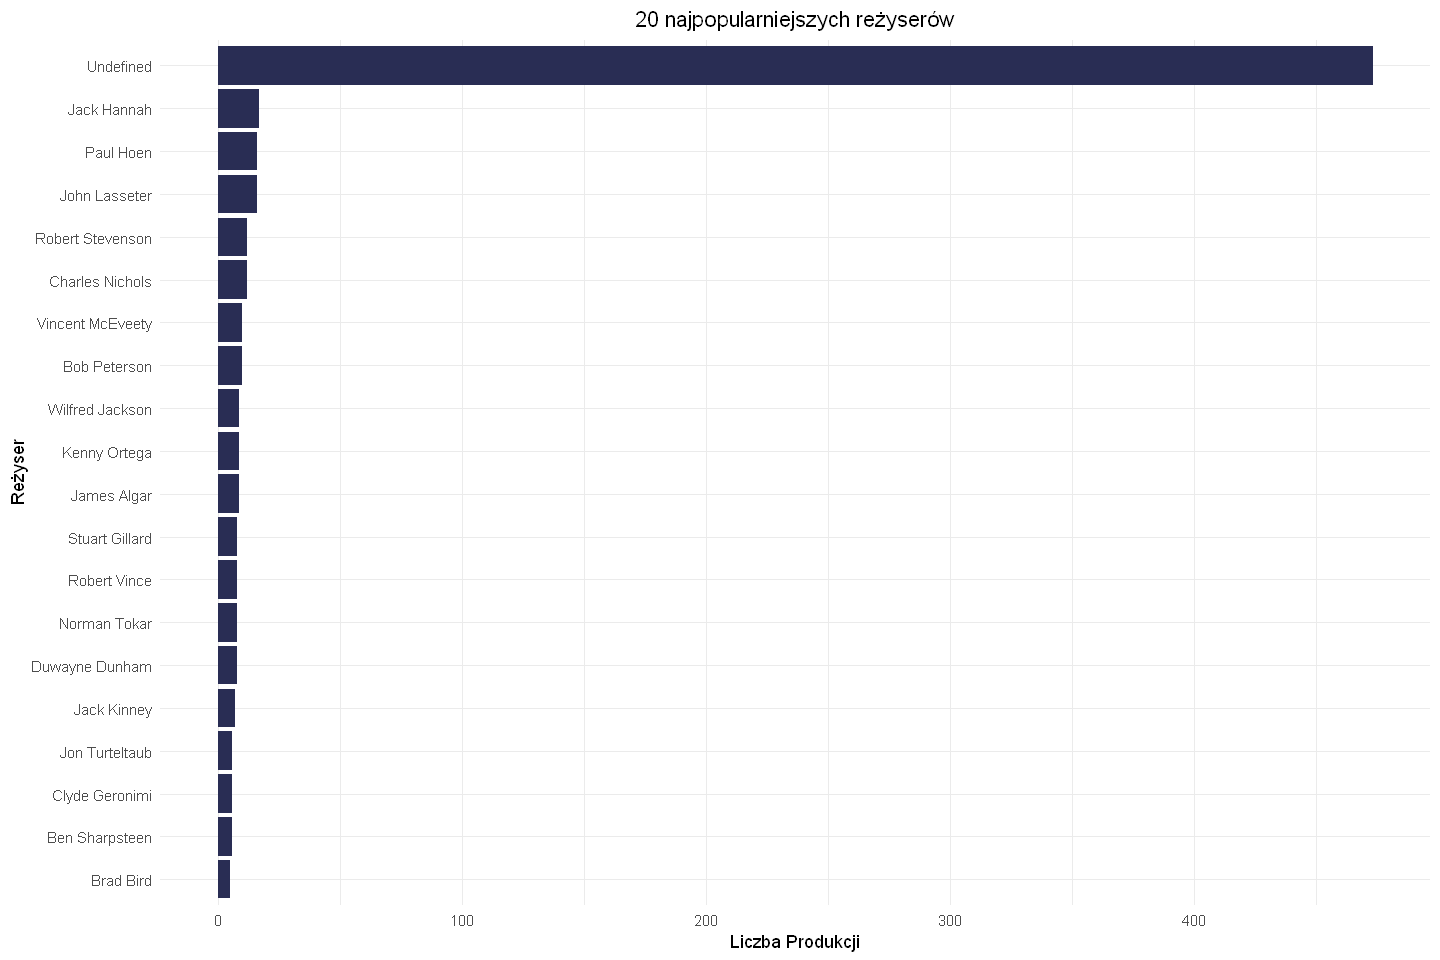

In [282]:
top_directors <- data %>%
  count(director, sort = TRUE) %>%
  head(20)  

ggplot(top_directors, aes(x = reorder(director, n), y = n)) +
  geom_bar(stat = "identity", fill = "#292d54") +  
  coord_flip() +  
  labs(title = "20 najpopularniejszych reżyserów", x = "Reżyser", y = "Liczba Produkcji") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))  

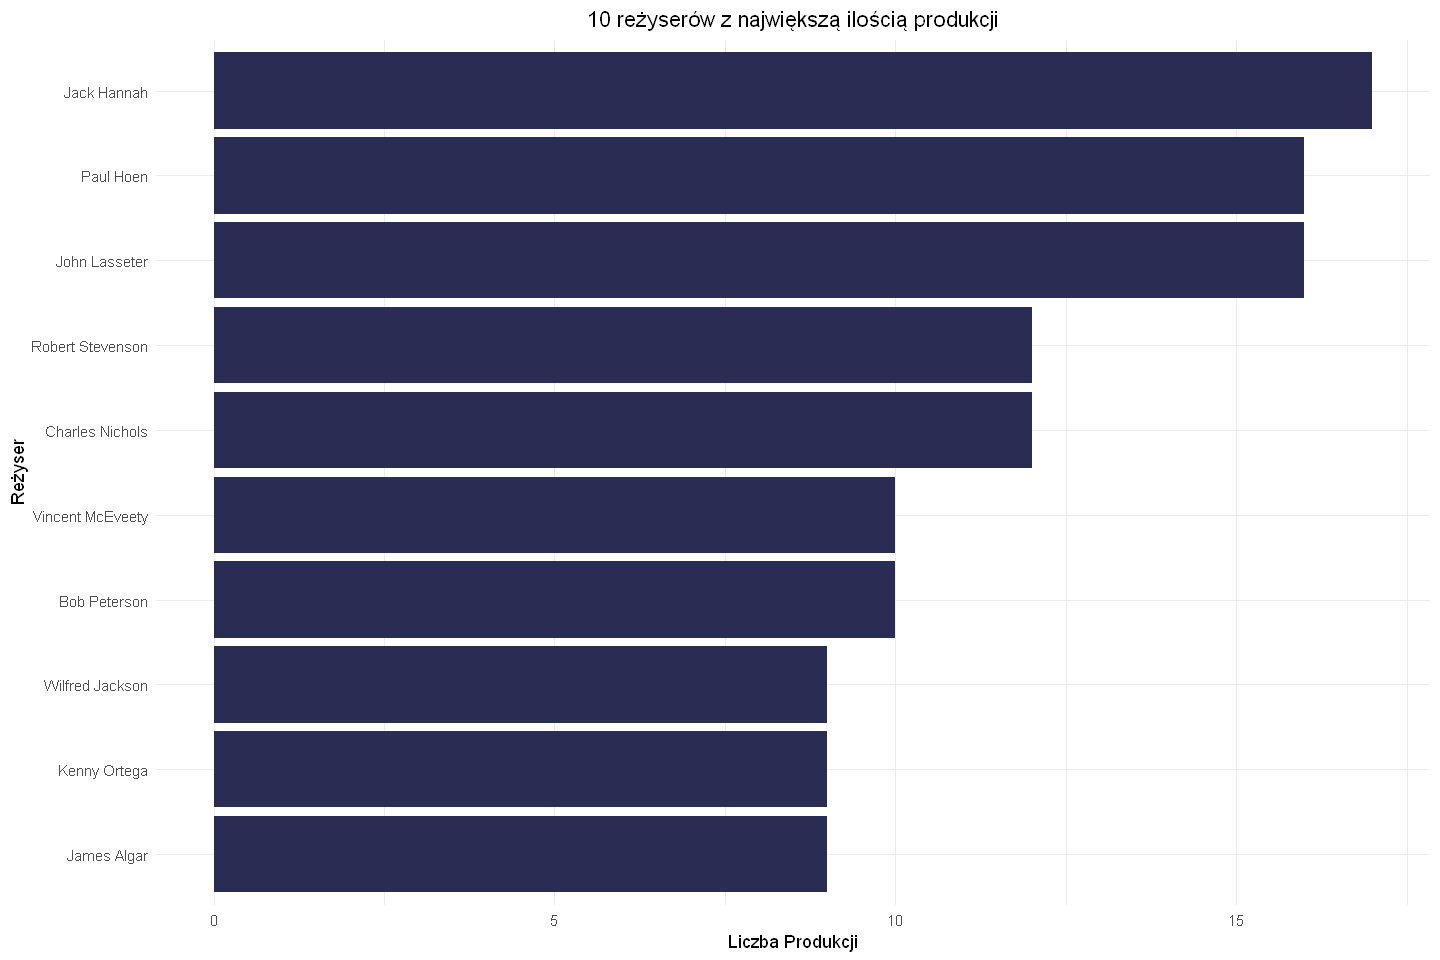

In [284]:
top_directors <- data %>%
  filter(director != "Undefined") %>%
  count(director, sort = TRUE) %>%
  head(10)

ggplot(top_directors, aes(x = reorder(director, n), y = n)) +
  geom_bar(stat = "identity", fill = "#292d54") +  
  coord_flip() +  
  labs(title = "10 reżyserów z największą ilością produkcji", x = "Reżyser", y = "Liczba Produkcji") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))  

Nie uwzględniając produkcji gdzie reżyser jest nieokreślony, największą ilość filmów reżyserował Jack Hannah. Na ostatnich miejscach w top 10 znajdują się Wilfred Jackson, Kenny Ortega, James Algar.

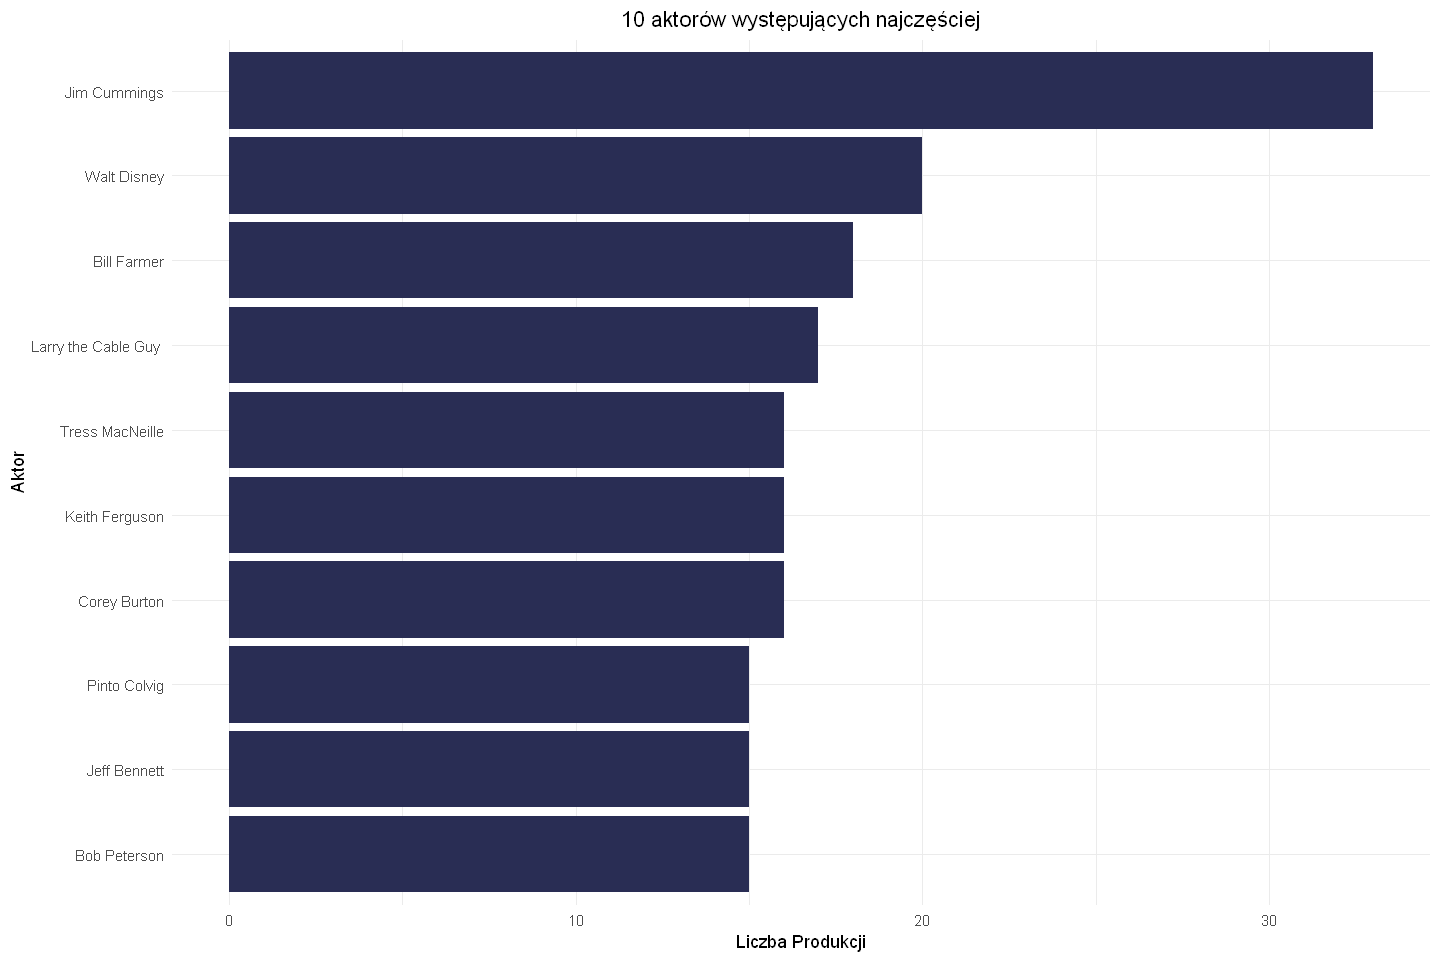

In [287]:
top_actors <- data %>%
  mutate(cast = strsplit(as.character(cast), ", ")) %>%
  unnest(cast) %>%  
  filter(cast != "Undefined") %>%
  count(cast, sort = TRUE) %>%
  head(10)  

ggplot(top_actors, aes(x = reorder(cast, n), y = n)) +
  geom_bar(stat = "identity", fill = "#292d54") +  
  coord_flip() +  
  labs(title = "10 aktorów występujących najczęściej", x = "Aktor", y = "Liczba Produkcji") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))  

Najpopularniejszym aktorem jest zdecydowanie Jim Cummings.

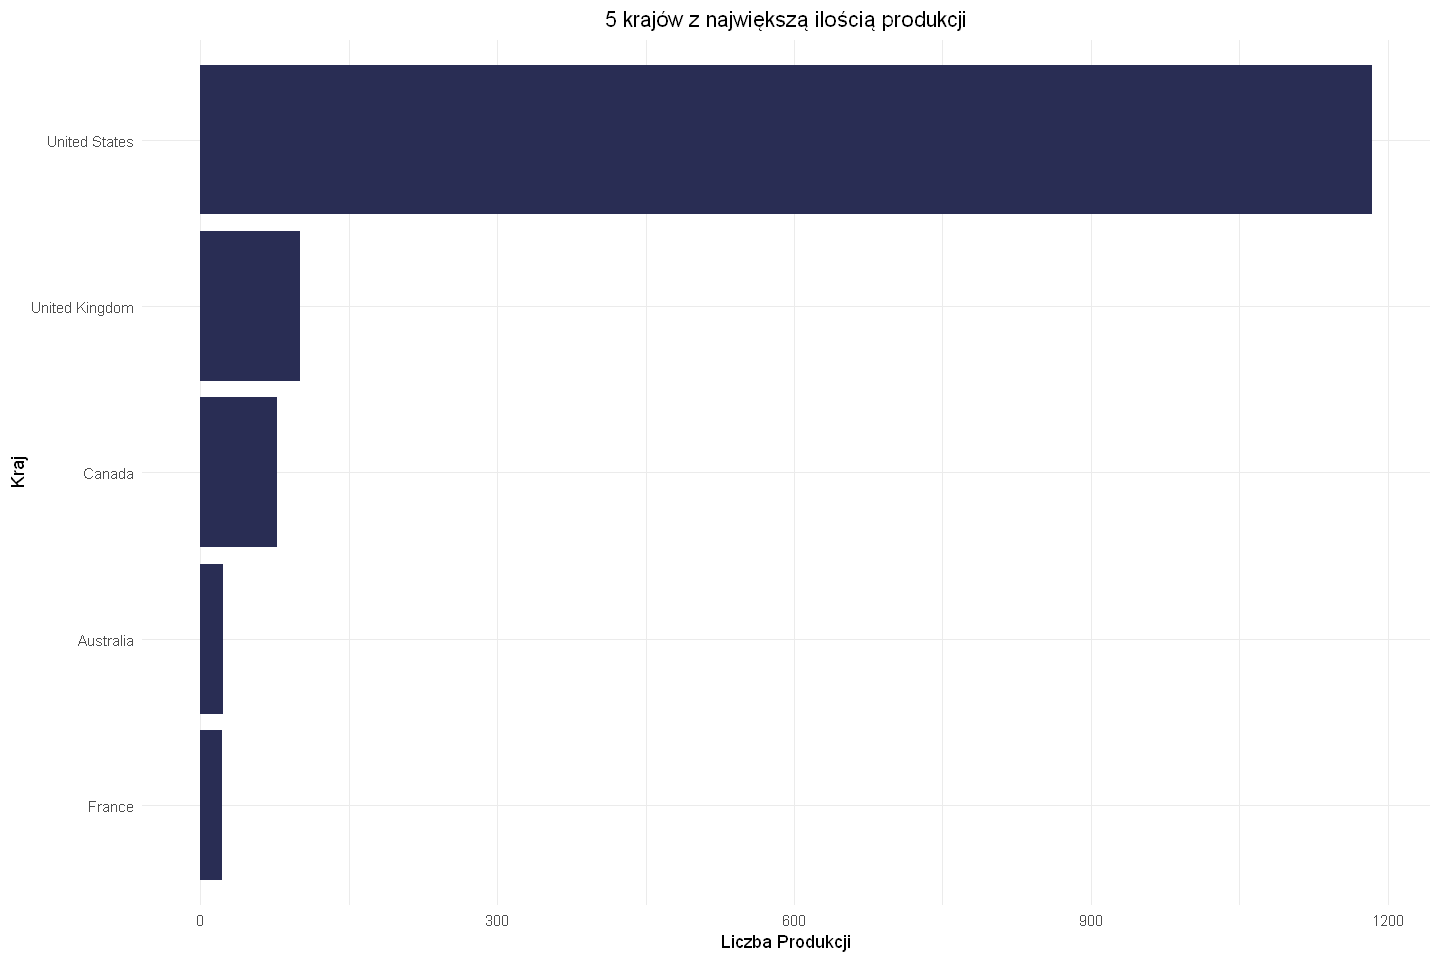

In [290]:
top_countries <- data %>%
  mutate(country = strsplit(as.character(country), ", ")) %>%
  unnest(country) %>%  
  filter(country != "Undefined") %>%
  count(country, sort = TRUE) %>%
  head(5)  

ggplot(top_countries, aes(x = reorder(country, n), y = n)) +
  geom_bar(stat = "identity", fill = "#292d54") +  
  coord_flip() +  
  labs(title = "5 krajów z największą ilością produkcji", x = "Kraj", y = "Liczba Produkcji") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))  

W liczbie produkcji zdecydowanie przeważają Stany Zjednoczone, na drugim miejscu (jednak daleko za nimi) znajduje się Wielka Brytania.

In [293]:
data$date_added <- mdy(data$date_added)

data$year_added <- year(data$date_added)

year_counts <- table(data$year_added)

year_data <- as.data.frame(year_counts)
colnames(year_data) <- c("year", "count")

Warning message:
" 3 failed to parse."


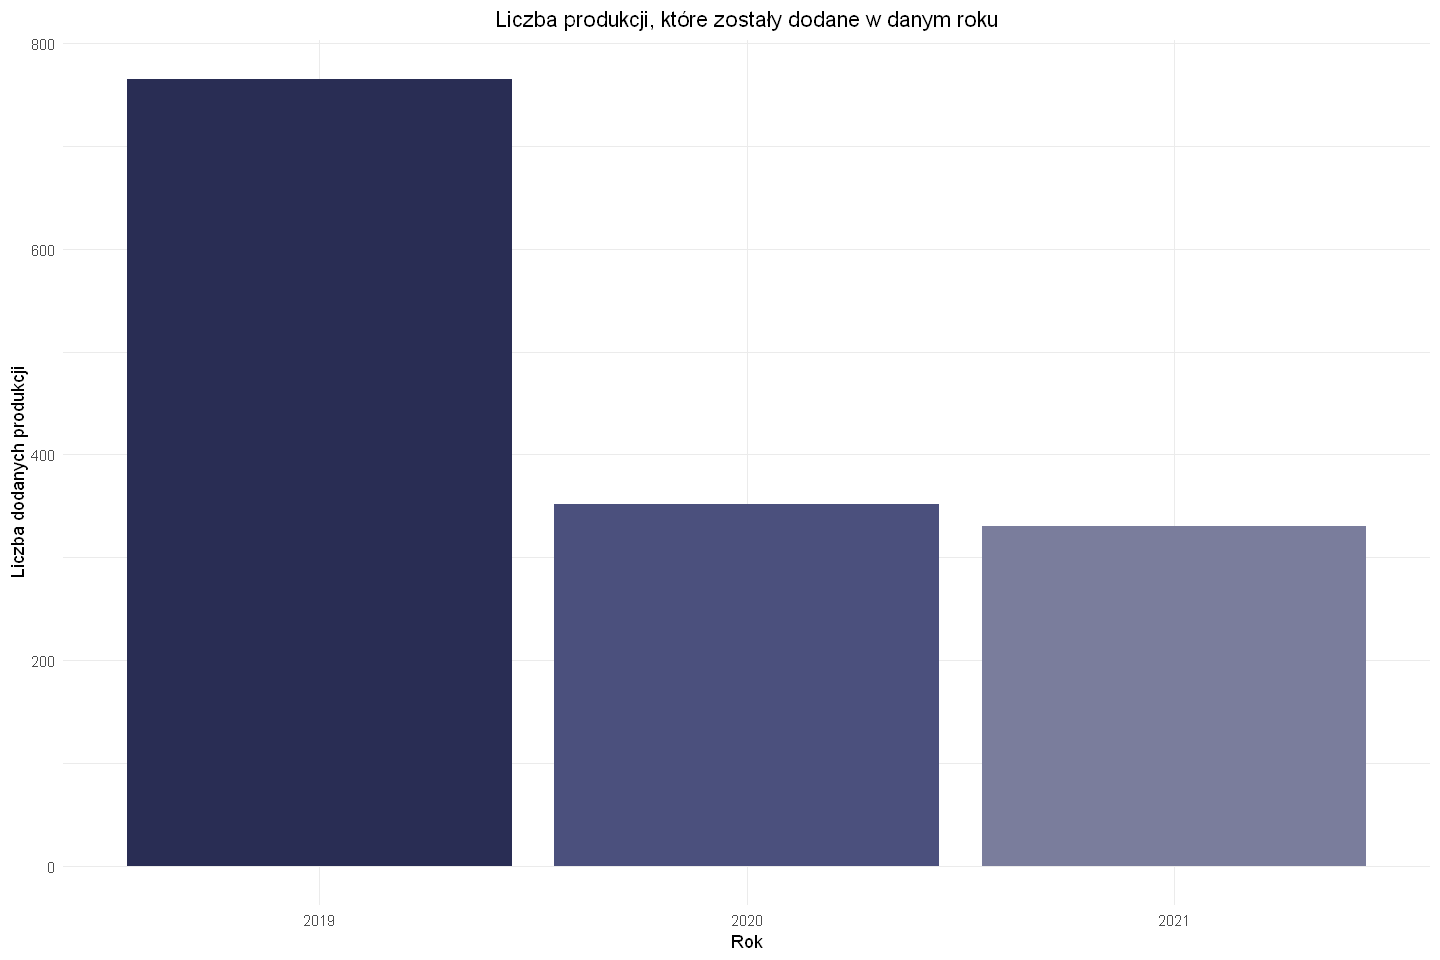

In [299]:
ggplot(year_data, aes(x = year, y = count, fill = factor(year))) +
  geom_bar(stat = "identity", show.legend = FALSE) +
  labs(title = "Liczba produkcji, które zostały dodane w danym roku", x = "Rok", y = "Liczba dodanych produkcji") +
  scale_fill_manual(values = c("#292d54", "#4b507d", "#7a7d9c", "#a0a3b7")) +  
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))  

Najwięcej produkcji zostało dodanych na Disney+ w 2019 roku.

In [302]:
release_year_counts <- table(data$release_year)

release_year_data <- as.data.frame(release_year_counts)
colnames(release_year_data) <- c("release_year", "count")

release_year_data$release_year <- as.numeric(as.character(release_year_data$release_year))

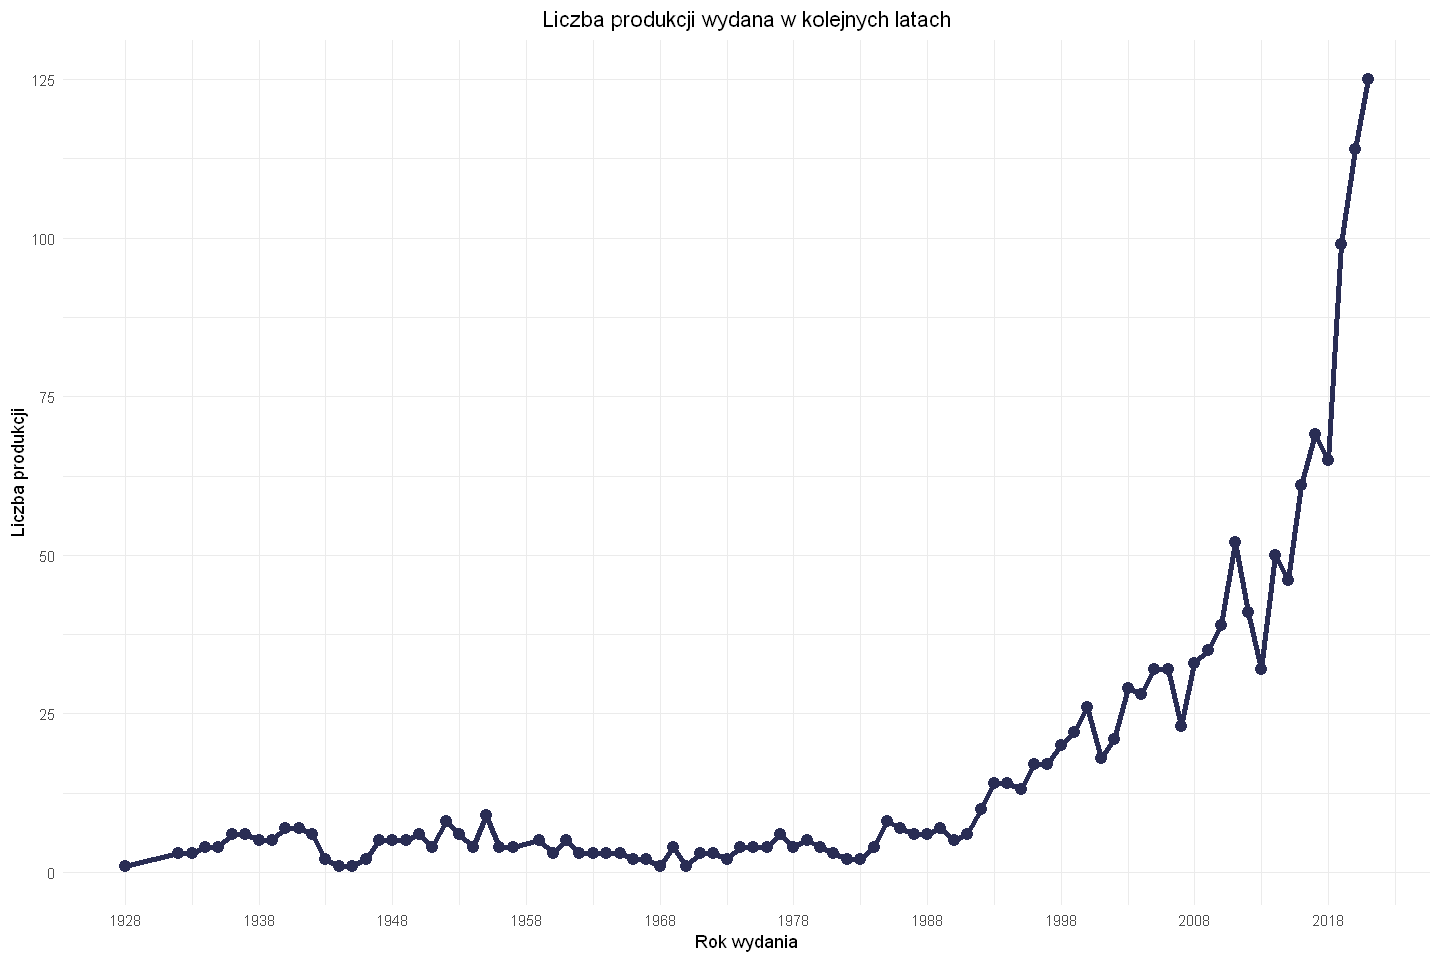

In [310]:
ggplot(release_year_data, aes(x = release_year, y = count)) +
  geom_line(aes(group = 1), color = "#292d54", size = 1.5) +  
  geom_point(color = "#292d54", size = 3) +    
  labs(title = "Liczba produkcji wydana w kolejnych latach", x = "Rok wydania", y = "Liczba produkcji") +
  scale_x_continuous(breaks = seq(min(release_year_data$release_year), 
                                  max(release_year_data$release_year), by = 10)) +  
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))  

Po roku 2000 liczba produkcji zaczęła drastycznie wzrastać, a od roku 2019 obserwujemy tylko wzrost bez żadnych spadków w ilości wydawanych produkcji.

In [313]:
rating_counts <- table(data$rating)

rating_data <- as.data.frame(rating_counts)
colnames(rating_data) <- c("rating", "count")

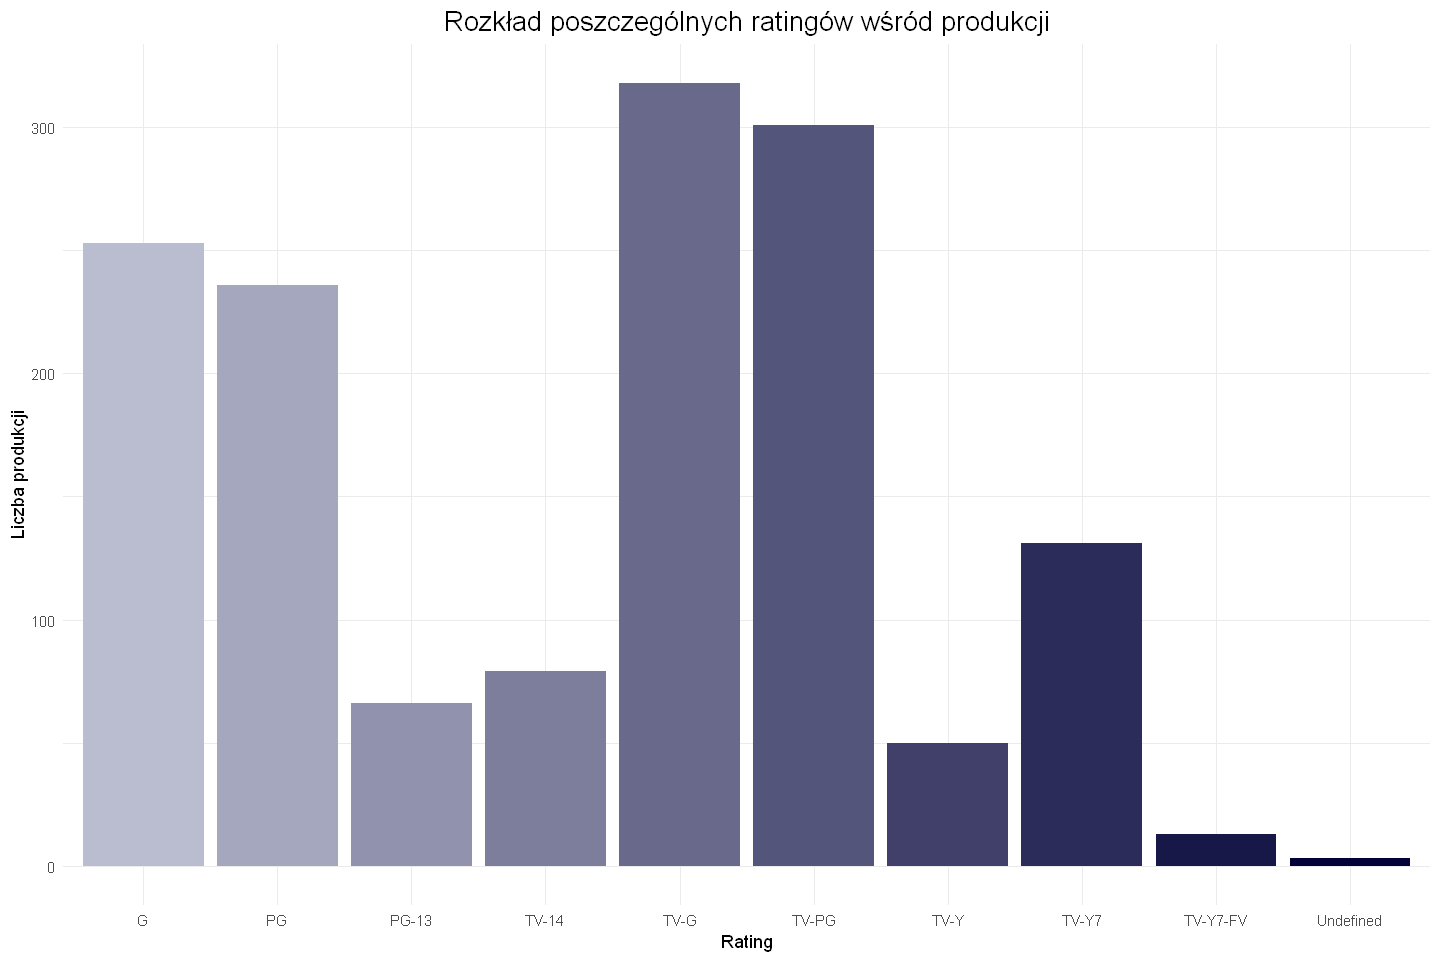

In [341]:
gradient_colors <- c("#babccf", "#a5a7be", "#9192ad", "#7d7e9c", "#68698b", 
                     "#54557b", "#40406a", "#2b2c59", "#171748", "#020238")

ggplot(rating_data, aes(x = rating, y = count, fill = rating)) +
  geom_bar(stat = "identity") +  
  scale_fill_manual(values = gradient_colors) +  # Ustawiamy kolory
  labs(title = "Rozkład poszczególnych ratingów wśród produkcji", x="Rating", y="Liczba produkcji") +                
  theme_minimal() + 
  theme(
    plot.title = element_text(hjust = 0.5, size = 16),
    legend.position = "none"
  )

Najczęściej występujące ratingi to TV-G i TV-PG, czyli odpowiedni dla każdego wieku oraz zalecany nadzór rodziców (odpowiednie dla dzieci, jednak pod nadzorem rodziców).

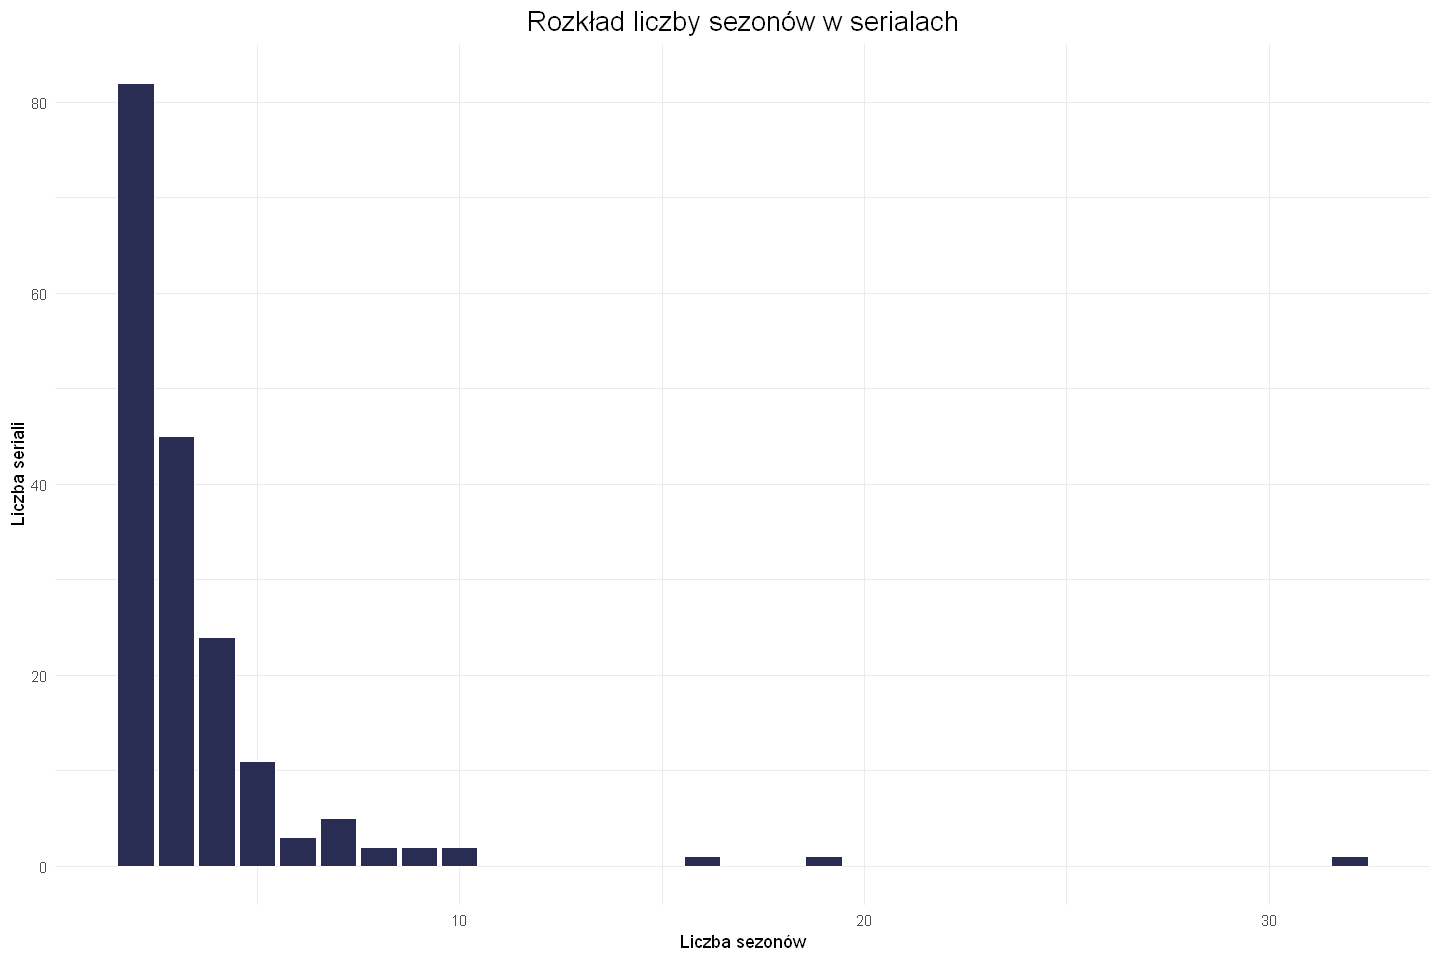

In [331]:
tv_show_data <- data %>% filter(type == "TV Show")

tv_show_data <- tv_show_data %>% 
  filter(grepl("^\\d+ Seasons$", duration))

tv_show_data$seasons <- as.numeric(gsub(" Seasons", "", tv_show_data$duration))

ggplot(tv_show_data, aes(x = seasons)) +
  geom_bar(fill = "#292d54", color = "white") +  
  labs(title = "Rozkład liczby sezonów w serialach", x = "Liczba sezonów", y = "Liczba seriali") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5, size = 16)
  )

Największa ilość seriali ma do 2-3 sezonów, tylko nieliczne seriale mają więcej niż 5 sezonów.

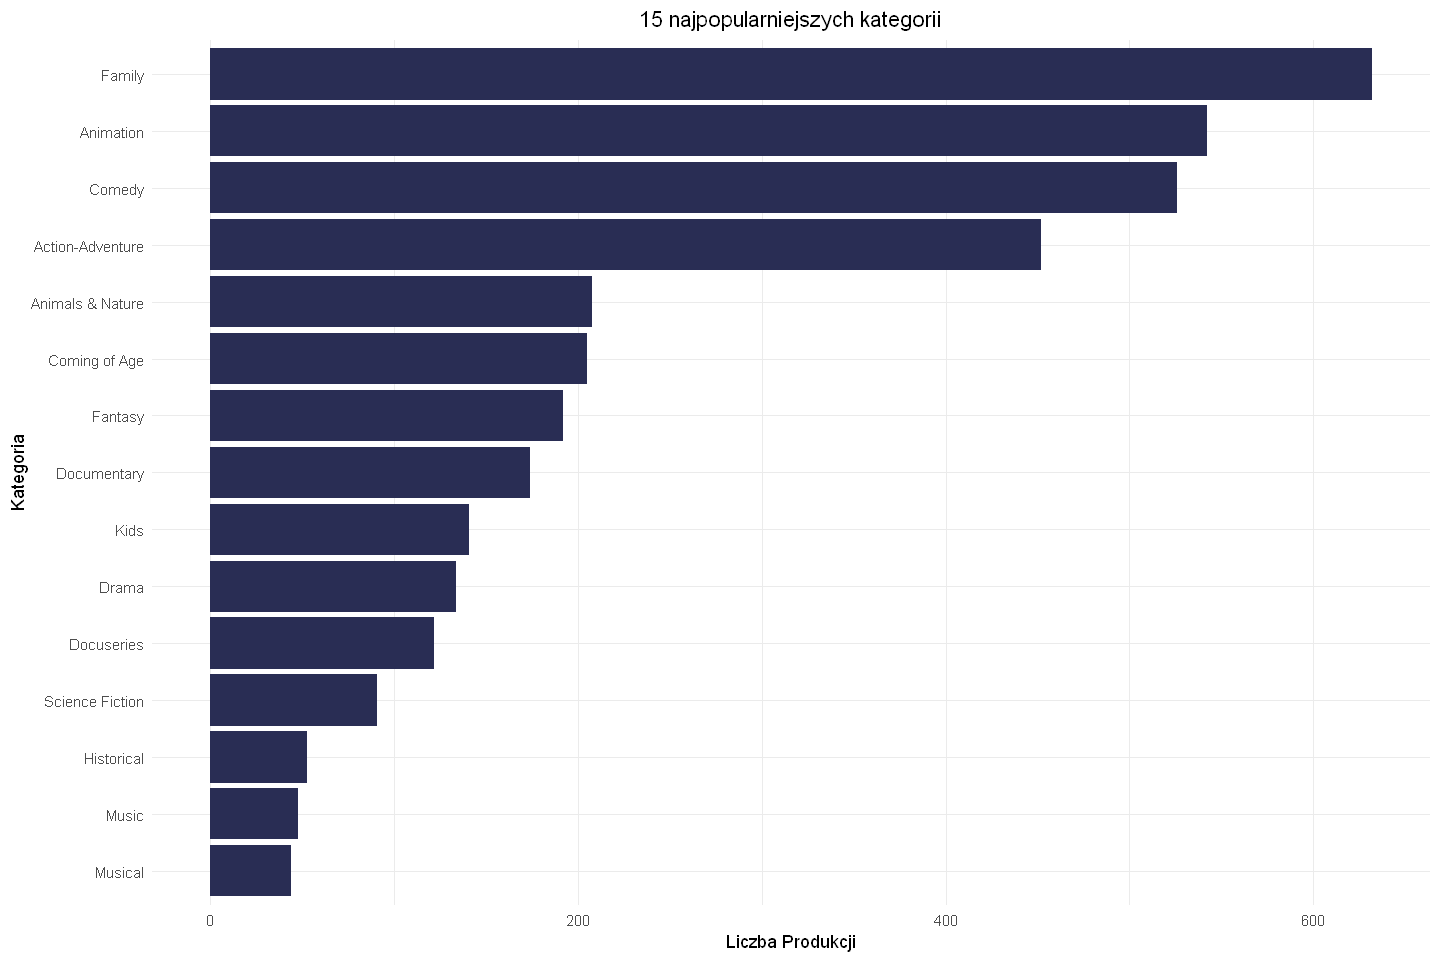

In [346]:
category_data <- data %>%
  mutate(listed_in = strsplit(as.character(listed_in), ", ")) %>%  
  unnest(listed_in) %>%  
  count(listed_in, sort = TRUE) %>%  
  top_n(15, n)  

ggplot(category_data, aes(x = reorder(listed_in, n), y = n)) +
  geom_bar(stat = "identity", fill = "#292d54") +  
  coord_flip() +  
  labs(title = "15 najpopularniejszych kategorii", x = "Kategoria", y = "Liczba Produkcji") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5))

Kategoriami z największą ilością produkcji są kategorie Family (filmy familijne), Animation (animacje), Comedy (filmy komediowe) i Action-Adventure (przygodowe filmy akcji). Ostanie miejsce w top 15 zajmują musicale.